In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_excel("SHG_Booking_Data.xlsx")

In [3]:
df.head()

,Booking ID,Hotel,Booking Date,Arrival Date,Lead Time,Nights,Guests,Distribution Channel,Customer Type,Country,Deposit Type,Avg Daily Rate,Status,Status Update,Cancelled (0/1),Revenue,Revenue Loss
0,1,Resort,2014-07-24,2015-07-01,342,0,2,Direct,Transient,Portugal,No Deposit,0.0,Check-Out,2015-07-01,0,0.0,0.0
1,2,Resort,2013-06-24,2015-07-01,737,0,2,Direct,Transient,Portugal,No Deposit,0.0,Check-Out,2015-07-01,0,0.0,0.0
2,3,Resort,2015-06-24,2015-07-01,7,1,1,Direct,Transient,United Kingdom,No Deposit,75.0,Check-Out,2015-07-02,0,75.0,0.0
3,4,Resort,2015-06-18,2015-07-01,13,1,1,Corporate,Transient,United Kingdom,No Deposit,75.0,Check-Out,2015-07-02,0,75.0,0.0
4,5,Resort,2015-06-17,2015-07-01,14,2,2,Online Travel Agent,Transient,United Kingdom,No Deposit,98.0,Check-Out,2015-07-03,0,196.0,0.0


In [4]:
df.shape

(119390, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Booking ID            119390 non-null  int64         
 1   Hotel                 119390 non-null  object        
 2   Booking Date          119390 non-null  datetime64[ns]
 3   Arrival Date          119390 non-null  datetime64[ns]
 4   Lead Time             119390 non-null  int64         
 5   Nights                119390 non-null  int64         
 6   Guests                119390 non-null  int64         
 7   Distribution Channel  119390 non-null  object        
 8   Customer Type         119390 non-null  object        
 9   Country               118902 non-null  object        
 10  Deposit Type          119390 non-null  object        
 11  Avg Daily Rate        119390 non-null  float64       
 12  Status                119390 non-null  object        
 13 

In [6]:
#Convert booking id and cancelled column to string
df["Cancelled (0/1)"] = df["Cancelled (0/1)"].astype(str)
df["Booking ID"] = df["Booking ID"].astype(str)

# Analysis

## 1. Booking Patterns
### A. What is the trend in booking patterns over time, and are there specific seasons or months with increased booking activity?

In [7]:
#Extract month from booking date
df["Booking Month"] = df["Booking Date"].dt.month

In [8]:
#Create a new column with the three-letter month abbreviations
import calendar
df["Booking Month Name"] = df["Booking Month"].apply(lambda x: calendar.month_abbr[x])

In [9]:
Booking_Count_df = df["Booking Month Name"].value_counts()

#Convert to a DataFrame
Booking_Count_df = Booking_Count_df.reset_index()

#Rename the columns
Booking_Count_df.columns = ['Month', 'Bookings']

#Define the order for the months
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

#Convert the 'Month' column to a categorical type with the defined order
Booking_Count_df['Month'] = pd.Categorical(Booking_Count_df['Month'], categories = month_order, ordered=True)

#Sort the DataFrame by the 'Month' column
Booking_Count_df = Booking_Count_df.sort_values('Month')

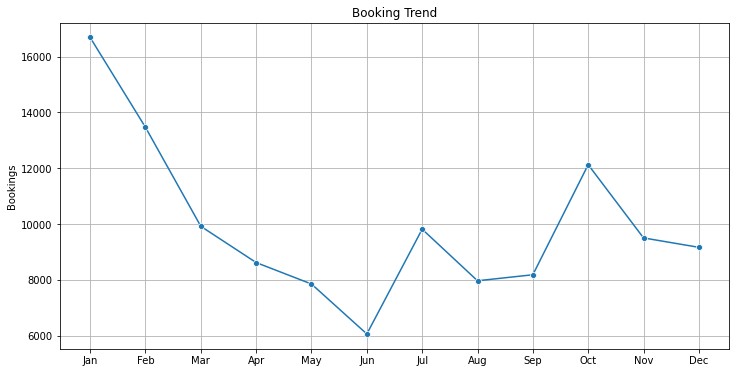

In [10]:
plt.figure(figsize = (12,6))
sns.lineplot(x = 'Month', y = "Bookings", data = Booking_Count_df, marker = 'o')
plt.title('Booking Trend')
plt.ylabel('Bookings')
plt.xlabel(' ')
plt.grid(True)
plt.show()

The chart shows a sharp decline from January to Jun, suggesting a lower demand period post-New Year celebrations. Bookings rise noticeably in July and August, and again in October, possibly due to holiday seasons and end-of-year festivities. The graph highlights January, July, and October as the months with increased booking activities.

In [11]:
# Extract year from booking date
df["Booking Year"] = df["Booking Date"].dt.year

In [12]:
df["Booking Year"] = df["Booking Year"].astype(str)

In [13]:
Booking_Year_df = df["Booking Year"].value_counts()

#Convert to a DataFrame
Booking_Year_df = Booking_Year_df.reset_index()

#Rename the columns
Booking_Year_df.columns = ['Year', 'Bookings']

#Define the order for the months
year_order = ['2013', '2014', '2015', '2016', '2017']

#Convert the 'Month' column to a categorical type with the defined order
Booking_Year_df['Year'] = pd.Categorical(Booking_Year_df['Year'], categories = year_order, ordered=True)

#Sort the DataFrame by the 'Month' column
Booking_Year_df = Booking_Year_df.sort_values('Year')

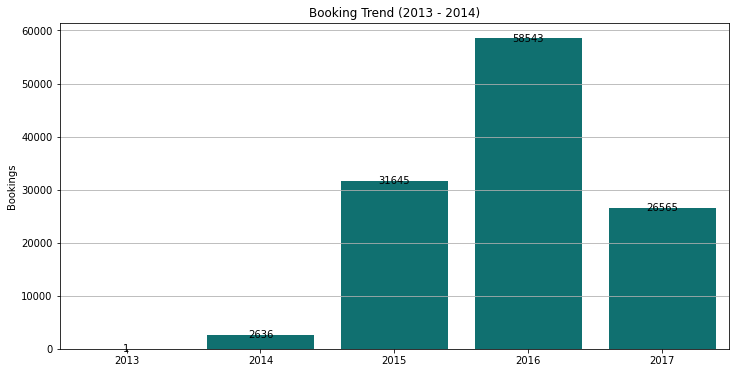

In [14]:
plt.figure(figsize = (12,6))
barplot = sns.barplot(x = 'Year', y = 'Bookings', data = Booking_Year_df, color = 'teal')

#Iterate over the bars in the barplot and add text labels
for bar in barplot.patches:
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height() + 3, 
             round(bar.get_height()),  
             ha='center', 
             va='center')

plt.title('Booking Trend (2013 - 2014)')
plt.ylabel('Bookings')
plt.xlabel(' ')
plt.grid(axis = 'y')
plt.show()

The chart shows the number of bookings for each year from 2013 to 2017. It indicates a large increase in bookings in 2016 after a lower number in previous years. There's a slight drop in 2017, but the numbers still remain high compared to 2013 and 2014. This suggests that 2016 was a particularly busy year for bookings, while 2017, despite a decrease, also saw a relatively high number of bookings.

### B. How does lead time vary across different booking channels, and is there a correlation between lead time and customer type?

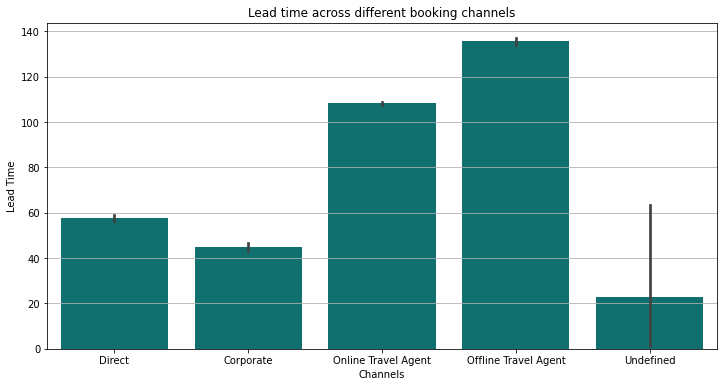

In [15]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'Distribution Channel', y = 'Lead Time', data = df, color = 'teal')
plt.title('Lead time across different booking channels')
plt.ylabel('Lead Time')
plt.xlabel('Channels')
plt.grid(axis = 'y')
plt.show()

This shows that bookings made through Offline Travel Agents typically have the longest lead time, followed by Offline Travel Agents. Direct bookings and those through Corporate bookings have shorter lead times, while the 'Undefined' category has the shortest. 

**Checking for correlation between lead time and customer type**

In [16]:
from scipy import stats

#convert 'Customer Type' to a numeric category type
df['Customer Type Cat'] = df['Customer Type'].astype('category').cat.codes

#Group 'Lead Time' data by 'Customer Type'
groups = df.groupby('Customer Type Cat')['Lead Time'].apply(list)

#ANOVA
f_value, p_value = stats.f_oneway(*groups)

print(f"F-value: {f_value}")
print(f"P-value: {p_value}")

F-value: 1366.498149578901
P-value: 0.0


The F-value and P-value of suggest a statistically significant relationship between the booking channel and the lead time. A high F-value typically indicates a strong correlation, and a P-value of 0.0 (or close to 0) suggests the results are statistically significant, meaning the observed relationship is unlikely due to random chance. This statistical evidence supports the visual trends seen in the chart, where different booking channels are associated with different lead times.

## 2. Customer Behavior Analysis
### A. Which distribution channels contribute the most to bookings, and how does the average daily rate (ADR) differ across these channels?


In [17]:
Channel_df = df['Distribution Channel'].value_counts()

#Convert to a DataFrame
Channel_df = Channel_df.reset_index()

#Rename the columns
Channel_df.columns = ['Channel', 'Bookings']

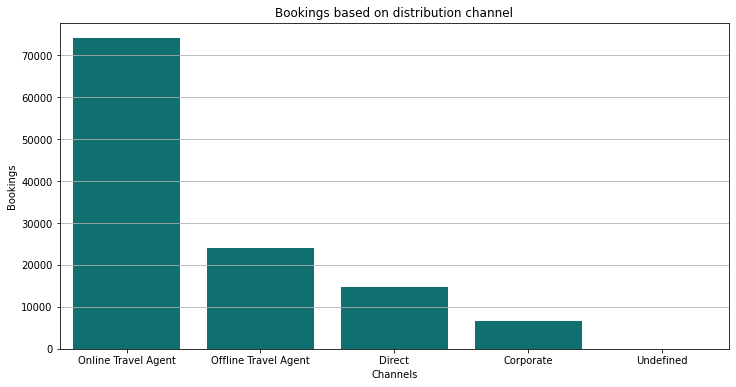

In [18]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'Channel', y = 'Bookings', data = Channel_df, color = 'teal')
plt.title('Bookings based on distribution channel')
plt.ylabel('Bookings')
plt.xlabel('Channels')
plt.grid(axis = 'y')
plt.show()

Online Travel Agent channel contributes the most to bookings, with more than 70,000 bookings. This could be due to the convenience and accessibility of booking online. Offline Travel Agents also have a notable number of bookings, likely due to their personalized service and expertise in handling complex arrangements. Direct bookings and Corporate channels show fewer bookings, which might reflect the more targeted nature of these channels, while the 'Undefined' category has the least.

**How does the average daily rate (ADR) differ across these channels?**

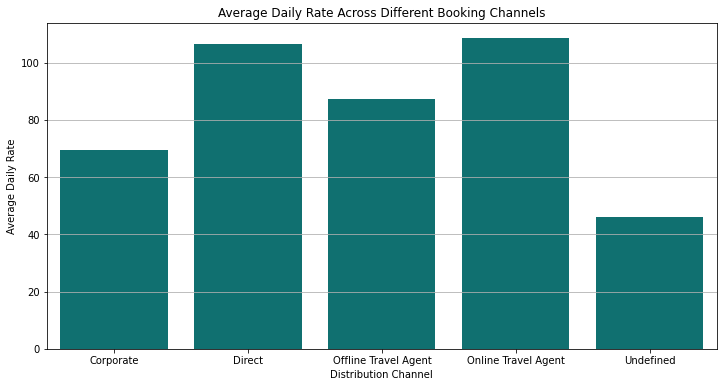

In [20]:
avg_ADR = df.groupby('Distribution Channel')['Avg Daily Rate'].mean()

#Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x = avg_ADR.index, y = avg_ADR.values, data = df, color='teal')
plt.title('Average Daily Rate Across Different Booking Channels')
plt.ylabel('Average Daily Rate')
plt.xlabel('Distribution Channel')
plt.grid(axis = 'y')
plt.show()

The Online Travel Agent and Direct channels appear to command higher ADRs compared to Corporate and Offline Travel Agent channels, with the 'Undefined' category having the lowest ADR. This suggests that bookings made through online agents and direct agreements might be more lucrative on a per-day basis and could be targeted for increased revenue.

### B. Can we identify any patterns in the distribution of guests based on their country of origin, and how does this impact revenue?

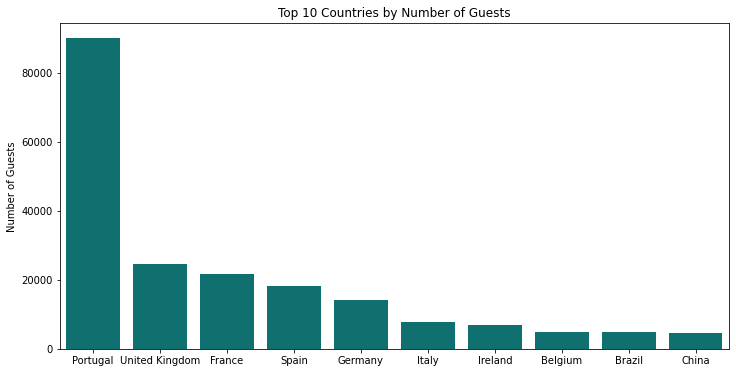

In [21]:
#Group by country and sum the number of guests
country_guests = df.groupby('Country')['Guests'].sum()

#the top countries (top 10)
top_country_guests = country_guests.sort_values(ascending=False).head(10)

#Plot
plt.figure(figsize=(12, 6))
sns.barplot(x = top_country_guests.index, y = top_country_guests.values, color = 'teal')
plt.title('Top 10 Countries by Number of Guests')
plt.xlabel(' ')
plt.ylabel('Number of Guests')
plt.show()

Portugal stands out as the country contributing the highest number of guests, followed by a significantly smaller number from the United Kingdom, and then progressively fewer from France, Spain, Germany, Italy, Ireland, Belgium, Brazil, and China. This suggests a pattern where the majority of guests originate from Portugal.

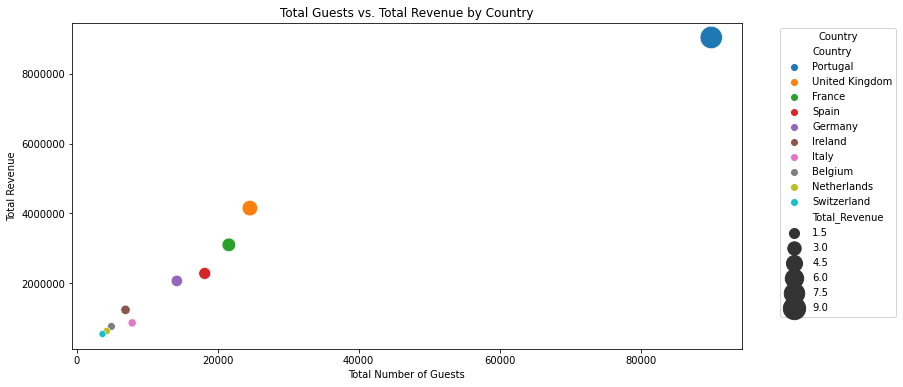

In [22]:
#Aggregate guest counts and total revenue by country
agg_df = df.groupby('Country').agg(Total_Guests = ('Guests', 'sum'), Total_Revenue = ('Revenue', 'sum'))

#Reset index so 'Country' becomes a column
agg_df = agg_df.reset_index()

#Filter for top countries by revenue
top_countries = agg_df.nlargest(10, 'Total_Revenue')

# Create a scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x = 'Total_Guests', y = 'Total_Revenue', data = top_countries, hue = 'Country', size = 'Total_Revenue', 
                sizes = (50, 500), legend = 'brief')

#y-axis to display full numbers
plt.ticklabel_format(style='plain', axis='y')

plt.title('Total Guests vs. Total Revenue by Country')
plt.xlabel('Total Number of Guests')
plt.ylabel('Total Revenue')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

The size of the bubbles represents the magnitude of total revenue. Portugal, with the largest bubble, indicates a substantial number of guests and the highest revenue, suggesting a strong market presence. Other countries show varying numbers of guests and corresponding revenue levels, but all are significantly smaller compared to Portugal. 

## 3. Revenue Optimization
### A. What is the overall revenue trend, and are there specific customer segments or countries contributing significantly to revenue?

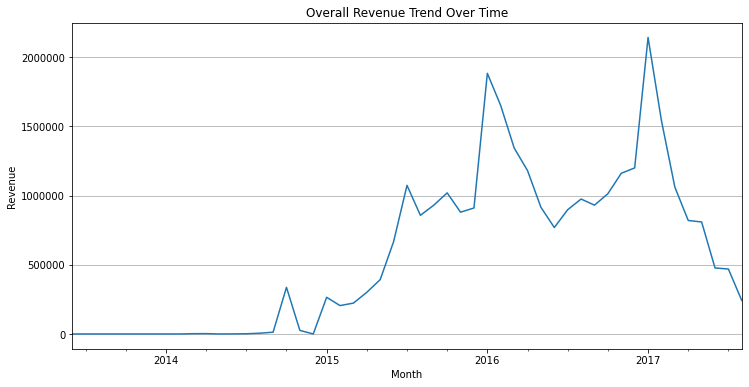

In [23]:
monthly_revenue = df.resample('M', on='Booking Date')['Revenue'].sum()

#Plot the overall revenue trend over time
plt.figure(figsize=(12, 6))
monthly_revenue.plot()
plt.title('Overall Revenue Trend Over Time')
#y-axis to display full numbers
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.grid(axis = 'y')
plt.show()

The line graph tracks how much revenue was made from 2013 to 2017. There's a notable increase leading into 2016 with a peak, which then drops before another sharp rise. The end of 2017 shows a sharp decline in revenue. The chart shows that the highest and lowest revenue generated often happen around the start or end of the year.

**Are there specific customer segments or countries contributing significantly to revenue?**

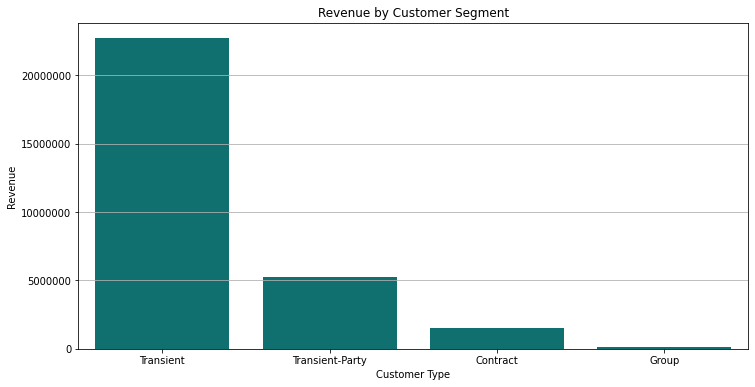

In [24]:
#group by 'Customer Type' and sum the revenue
customer_type_revenue = df.groupby('Customer Type')['Revenue'].sum().sort_values(ascending=False)

#Plot revenue by customer segment
plt.figure(figsize=(12, 6))
sns.barplot(x=customer_type_revenue.index, y=customer_type_revenue.values, color = 'teal')
plt.title('Revenue by Customer Segment')
plt.xlabel('Customer Type')
plt.ylabel('Revenue')
#y-axis to display full numbers
plt.ticklabel_format(style='plain', axis='y')
plt.grid(axis = 'y')
plt.show()

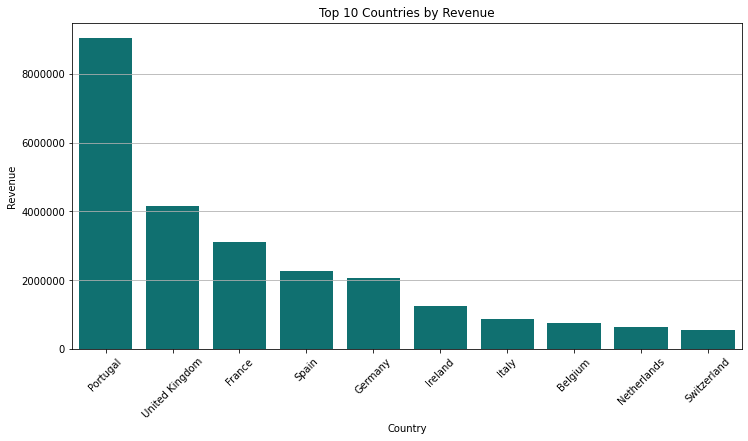

In [25]:
#group by 'Country' and sum the revenue
country_revenue = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False)

#plot the top 10 countries
plt.figure(figsize=(12, 6))
sns.barplot(x = country_revenue.head(10).index, y = country_revenue.head(10).values, color = 'teal')
plt.title('Top 10 Countries by Revenue')
plt.xlabel('Country')
plt.ylabel('Revenue')
plt.grid(axis = 'y')
#y-axis to display full numbers
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45)
plt.show()

The 'Transient' customer type brings in the most money, making over 20 million Naira, while other types make 5 million or less. Looking at countries, the top ten bring in most of the revenue, with Portugal at the top. Since Portugal has the most guests, it also makes the most money — over 8 million Naira. The UK, France, and Spain also add a good amount, with the UK making more than 4 million and France, Spain ad Germay each making over 2 million Naira.

### B. Can we identify optimal pricing strategies based on the Average Daily Rate (ADR) for different customer types and distribution channels?

In [27]:
#pivot table to be used for heatmap
pivot_table = pd.pivot_table(df, values='Avg Daily Rate', index='Customer Type', 
                             columns='Distribution Channel', aggfunc='mean')

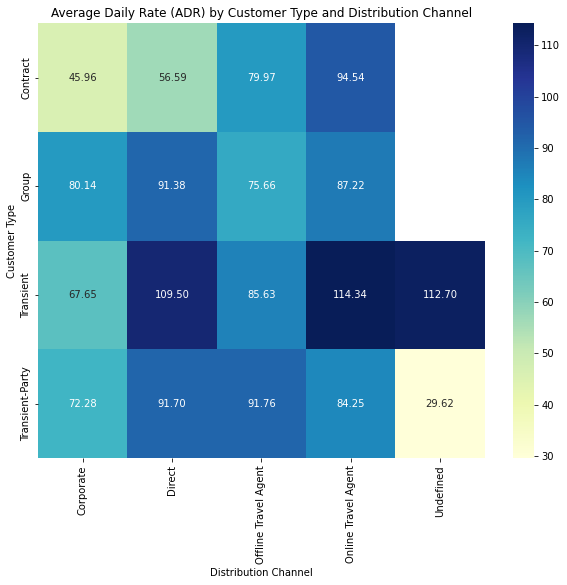

In [28]:
#Heatmap of ADR for Customer Types and Distribution Channels
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title('Average Daily Rate (ADR) by Customer Type and Distribution Channel')
plt.ylabel('Customer Type')
plt.xlabel('Distribution Channel')
plt.show()

The color intensity indicates the ADR level, with darker shades representing higher rates. From the chart, Transient customers booked through Online Travel Agents have the highest ADR, ad also for the Undefined and Direct category, suggesting they may be willing to pay more. Contrastingly, the Corporate and Contract segments show lower ADRs across most channels. 

This indicates that pricing strategies could be optimized by targeting higher rates where customer willingness to pay is greater, such as with Transient customers online, and possibly offering competitive rates for Corporate and Contract segments to maintain volume. 

## 4. Geographical Analysis
### A. How does the distribution of guests vary across different countries, and are there specific countries that should be targeted for marketing efforts?

The scatter plot shows that Portugal has both the highest number of guests and the highest revenue, making it a significant market. The United Kingdom, France, and Spain also contribute considerable numbers of guests and revenue but to a lesser extent. Other countries like Germany, Ireland, Italy, Belgium, Netherlands, and Switzerland represent smaller markets in terms of both guests and revenue.

Given Portugal's dominance in both guests and revenue, it would be a primary target for continued or increased marketing efforts. Additionally, the UK, France, and Spain show potential for growth and could be key targets for marketing campaigns aimed at increasing guest numbers and revenue.

### B. Is there a correlation between the country of origin and the likelihood of cancellations or extended stays?

In [29]:
#the cancellation rate by country
cancellation_rates = df.groupby('Country')['Cancelled (0/1)'].mean()

#the average length of stay by country
average_stays = df.groupby('Country')['Nights'].mean()

In [30]:
#Convert country names to categorical codes
df['Country_Code'] = df['Country'].astype('category').cat.codes

#Pearson's correlation coefficient
correlation_coef, p_value = stats.pearsonr(df['Country_Code'], df['Nights'])
print(f"Pearson's Correlation Coefficient: {correlation_coef}, P-value: {p_value}")

Pearson's Correlation Coefficient: -0.01357721562391987, P-value: 2.7123162033839883e-06


The Pearson's Correlation Coefficient of approximately -0.014 suggests a very weak negative relationship between the country of origin and the likelihood of cancellations or extended stays. This value indicates that there is almost no linear correlation between these two variables.

However, the very low P-value (below 0.05) suggests that the correlation coefficient is statistically significant. This means that even though the relationship is very weak, it is unlikely to be due to random chance.

This statistical significance might not be meaningful for decisions since the correlation is so weak. It implies that other factors beyond the country of origin are likely more influential on the likelihood of cancellations or extended stays. Therefore, while the country of origin has some level of association with cancellation or stay length, it might not be a strong enough basis to inform strategies or marketing efforts. 

## 5. Operational Efficiency
### A. What is the average length of stay for guests, and how does it differ based on booking channels or customer types?

In [31]:
#Calculate the average length of stay
avg_length_of_stay = df['Nights'].mean()

#Calculate the average length of stay by Distribution Channel
avg_length_by_channel = df.groupby('Distribution Channel')['Nights'].mean()

# Calculate the average length of stay by Customer Type
avg_length_by_customer_type = df.groupby('Customer Type')['Nights'].mean()

print(avg_length_of_stay)
print(avg_length_by_channel)
print(avg_length_by_customer_type)

3.4279001591423066
Distribution Channel
Corporate               2.380710
Direct                  3.194333
Offline Travel Agent    3.922346
Online Travel Agent     3.408332
Undefined               3.400000
Name: Nights, dtype: float64
Customer Type
Contract           5.320658
Group              2.882149
Transient          3.447145
Transient-Party    3.064719
Name: Nights, dtype: float64


On average, guests spend about 3.43 nights at the hotel. Guests who book through corporate channels tend to have the shortest stays, averaging just 2.38 nights. In contrast, those who book through offline travel agents often stay longer, with an average of 3.92 nights, which is the longest stay among all the channels. 

When breaking down the length of stay by the type of customer, contract customers stay the longest, with stays averaging 5.32 nights, which suggests they are likely in town for business matters that require a longer presence. Group customers have shorter visits, with an average stay of 2.88 nights, which might reflect the brief nature of their travel, possibly for events or conferences. Transient customers, who are likely individual travelers, stay an average of 3.45 nights, and transient-party, have stays averaging 3.06 nights.

### B. Are there patterns in check-out dates that can inform staffing and resource allocation strategies?

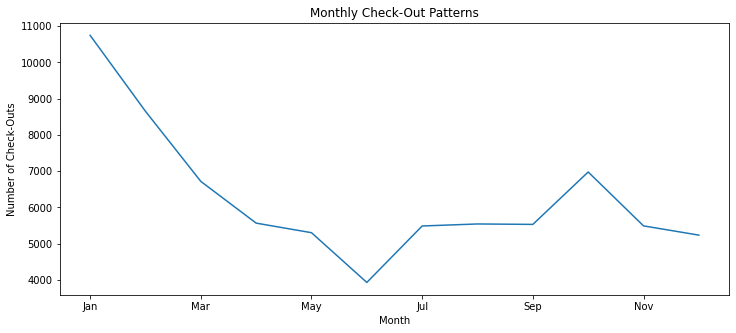

In [32]:
#Filter for checked-out bookings
checked_out_df = df[df['Status'] == 'Check-Out']

#Aggregate check-outs by month
monthly_check_out = checked_out_df['Booking Month Name'].value_counts().reindex(
    ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fill_value=0)

#Plot
plt.figure(figsize=(12, 5))
monthly_check_out.plot(kind='line')
plt.title('Monthly Check-Out Patterns')
plt.xlabel('Month')
plt.ylabel('Number of Check-Outs')
plt.show()

The line graph starts with a high number in January, which then declines steadily until May. There's a significant dip in June, followed by a sharp increase in July, which could suggest a seasonal trend or event that affects guest departures. Afterward, the numbers decline again through to November.

This pattern indicates that staffing and resources may need to be adjusted to accommodate the higher volume of check-outs in January, July, and october. With potential scaling back during the quieter months that follow each peak. 

## 6. Impact of Deposit Types
### A. How does the presence or absence of a deposit impact the likelihood of cancellations and revenue generation?

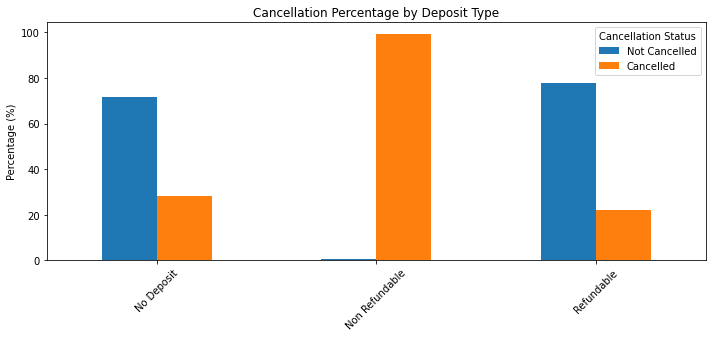

In [44]:
# Calculating percentage of cancellations for each deposit type
cancel_count = df.groupby('Deposit Type')['Cancelled (0/1)'].value_counts().unstack(fill_value=0)
cancel_percentage = cancel_count.div(cancel_count.sum(axis=1), axis=0) * 100

# Plotting the cancellation percentages in a grouped bar chart
cancel_percentage.plot(kind='bar', figsize=(10, 5))

# Beautifying the plot
plt.title('Cancellation Percentage by Deposit Type')
plt.ylabel('Percentage (%)')
plt.xlabel(' ')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Cancellation Status', labels=['Not Cancelled', 'Cancelled'])
plt.show()

It appears that bookings with "Non Refundable" deposits have a higher cancellation rate compared to those with "No Deposit" or "Refundable" deposits. This might seem counterintuitive, as one would expect non-refundable deposits to deter cancellations. 

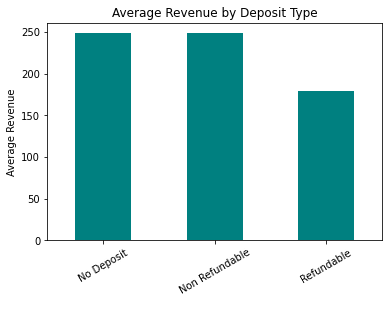

In [48]:
# Calculate the average revenue by deposit type
average_revenue = df.groupby('Deposit Type')['Revenue'].mean()

# Plot the average revenue
average_revenue.plot(kind='bar', color='teal')
plt.title('Average Revenue by Deposit Type')
plt.ylabel('Average Revenue')
plt.xlabel(' ')
plt.xticks(rotation = 30)
plt.show()

The average revenue for the no deposit category is quite high, suggesting that not requiring a deposit does not necessarily result in lower revenue. This could be because customers who do not want to commit to a deposit may be willing to pay higher rates later. Also, Bookings that require a non-refundable deposit typically have slightly higher or comparable average revenue to those with no deposit. This suggests that customers are potentially attracted by a lower price point in exchange for the lack of flexibility. The average revenue for bookings with a refundable deposit is notably lower than the other two categories. This may indicate that while customers are attracted to the flexibility of a refundable deposit, they might spend less overall, or these bookings might be associated with lower-rate rooms or services.

***To understand why Refundable category has average revenue lower than other two categories***

In [50]:
#Calculate the average rate for each deposit category
avg_rate_by_deposit_type = df.groupby('Deposit Type')['Avg Daily Rate'].mean()
avg_rate_by_deposit_type

Deposit Type
No Deposit        103.525067
Non Refundable     89.964017
Refundable         76.209753
Name: Avg Daily Rate, dtype: float64

From the analysis, it's clear that customers like the option of a refundable deposit because it gives them the freedom to change their plans and the bookings often have lower prices. Hence, they tend to spend less money overall. On the other hand, bookings without a deposit or with a non-refundable deposit bring in more revenue, likely because the prices are higher. When customers don't pay a deposit or pay over the counter, they usually end up paying more.

### B. Can we identify any patterns in the use of deposit types across different customer segments?

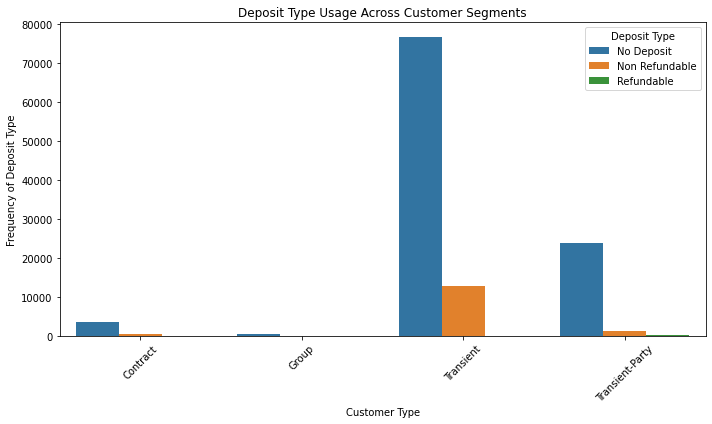

In [54]:
Group the data by 'Customer Type' and 'Deposit Type', and count the frequencies
deposit_patterns = df.groupby(['Customer Type', 'Deposit Type']).size().reset_index(name='Count')


plt.figure(figsize=(10, 6))
sns.barplot(data=deposit_patterns, x='Customer Type', y='Count', hue='Deposit Type')
plt.title('Deposit Type Usage Across Customer Segments')
plt.xlabel('Customer Type')
plt.ylabel('Frequency of Deposit Type')
plt.legend(title='Deposit Type')
plt.xticks(rotation=45) 
plt.tight_layout()  
plt.show()

In [55]:
deposit_patterns

,Customer Type,Deposit Type,Count
0,Contract,No Deposit,3530
1,Contract,Non Refundable,544
2,Contract,Refundable,2
3,Group,No Deposit,569
4,Group,Refundable,8
5,Transient,No Deposit,76684
6,Transient,Non Refundable,12909
7,Transient,Refundable,20
8,Transient-Party,No Deposit,23858
9,Transient-Party,Non Refundable,1134


The trend across all customer types is that No Deposit options are most common, which might indicate a general policy or preference among customers. Non Refundable deposits are the next most common choice, particularly among Transient and Transient-Party customers. Refundable deposits are very rarely chosen across all customer types, suggesting that this option may be less important to customers or could potentially come with higher costs that discourage its selection. 

## 7. Analysis of Corporate Bookings
### A. What is the proportion of corporate bookings, and how does their Average Daily Rate (ADR) compare to other customer types?

In [63]:
#Proportion of Corporate Bookings
total_bookings = len(df)
corporate_bookings = len(df[df['Distribution Channel'] == 'Corporate'])
corporate_proportion = corporate_bookings / total_bookings * 100
print(f"Proportion of Corporate Bookings: {corporate_proportion:.2f}%")

Proportion of Corporate Bookings: 5.59%


In [61]:
#average rate for each corporate bookings
avg_rate_C = df[df['Distribution Channel'] == 'Corporate']['Avg Daily Rate'].mean()
avg_rate_C

69.32520443312865

In [62]:
#average rate for each customer category
avg_rate_by_deposit_type = df.groupby('Customer Type')['Avg Daily Rate'].mean()
avg_rate_by_deposit_type

Customer Type
Contract            87.549637
Group               83.488579
Transient          107.013621
Transient-Party     86.084253
Name: Avg Daily Rate, dtype: float64

The proportion of corporate bookings is calculated to be 5.59% of the total bookings. This indicates that a relatively small fraction comes from the corporate sector.

Also, the Average Daily Rate (ADR) for corporate bookings stands at approximately 69.35. When compared to the ADRs of other customer types, which are 87.55 for Contract, 83.49 for Group, 107.01 for Transient, and 86.08 for Transient-Party, it can be observed that corporate bookings have a lower ADR than all other customer segments.

This disparity in ADR could be due to various factors, such as negotiated corporate rates, which are often lower due to volume-based discounts or long-term agreements between the hotel and corporate clients. The lower ADR for corporate bookings might also reflect a strategic pricing approach aimed at attracting and maintaining a steady flow of business travelers, who may offer more consistent occupancy rates and potentially spend on other hotel services.

In contrast, the Transient segments, which typically represent individual travelers, might not have the same negotiating leverage or might make bookings based on seasonal rates, leading to a higher ADR. 